# **Naive Bayes** (sau Clasificatorul bayesian naiv)

![Grafic](figs/naive-bayes.png "Naive Bayes Classifier")

Este un clasificator probabilistic, bazat pe Teorema lui Thomas Bayes (). Acesta porneste de la premise puternice de independenta intre caracteristicile de intrare $X=(x_{1}, x_{2}, ..., x_{k})$, presupunand fiecare $x_{i}$ ca fiind de sine stator, fara a fi corelat cu altul (de unde vine si numele de "*naiv*").

### Teorema lui Bayes
**Formula**:
$$
\boxed{P(A|B) = \frac{P(B|A)\cdot P(A)}{P(B)}}
$$

**Traducere libera**:

Probabilitatea unui eveniment A, avand deja un eveniment B, poate fi calculata prin probabilitatea evenimentului B, avandu-l pe A, inmultita cu probabilitatea lui A, supra probabilitatea lui B.

### In Machine Learning
Teorema lui Bayes aplicata pentru clasificare este folosita astfel:
$$
\longrightarrow P(y|X)=\frac{P(X|y)\cdot P(y)}{P(X)},
$$
unde: $X=(x_{1}, x_{2}, ..., x_{k})$.

**Traducere libera**:
- $P(y|X)$ => probabilitatea output-ului y daca avem caracteristicile X, numit si **posterior**!!
- $P(X|y)$ => probabilitatea input-ului X daca avem output-ul y
- $P(y)$ => probabilitatea output-ului y
- $P(X)$ => probabilitatea input-ului X

Pornind de la idea ca toate variabilele de intrare $x_{i}$ sunt independente una fata de cealalta, putem separa probabilitatea mare, a lui X in raport cu y, astfel:
$$
P(y|X)=\frac{P(x_{1}|y)\cdot P(x_{2}|y)\cdot ...\cdot P(x_{k}|y)\cdot P(y)}{P(X)}
$$
Intentia este de a selecta clasa $y_{i}$ cu cea mai mare probabilitate, avand caracteristicile $X$. Astfel, se scrie:
$$
y = argmax_{y}(P(y|X)) = argmax_{y}\frac{P(x_{1}|y)\cdot P(x_{2}|y)\cdot ...\cdot P(x_{k}|y)\cdot P(y)}{P(X)}
$$
Avand in vedere ca $P(X)$ nu are legatura cu $y$, il putem neglija, ajungand la ecuatia:
$$
y = argmax_{y}(P(x_{1}|y)\cdot P(x_{2}|y)\cdot ...\cdot P(x_{k}|y)\cdot P(y))
$$
Datorita faptului ca toate probabilitatile apartin $(0,1)$, vor aparea erori de calcul, inmultind numere flotante extrem de mici. Ca sa evitam operatia de inmultire, aplicam logaritmului natural, care are proprietatea de a desface produsul in suma:
$$
\boxed{y = argmax_{y}(ln(P(x_{1}|y)) + ln(P(x_{2}|y)) + ... + ln(P(x_{k}|y)) + ln(P(y)))}
$$

**Cum calculam probabilitatile acestea?**
- $P(y)$ - numita si probabilitatea anterioara, se refera la **frecventa fiecarei** clase (cati de 1 sau de 0 avem, cate mail-uri sunt spam si cate nu)
- $P(x_{i}|y)$ - numita si probabilitatea conditionala a clasei, se calculeaza dupa modelul gausian:
$$
P(x_{i}|y) = \frac{1}{\sqrt{2\pi\sigma_{y}^{2}}}\cdot e^{-(x_{i} - \mu_{y})^{2}/2\sigma_{y}^{2}}
$$
unde:
- $\mu_{y}$ => ***media*** aritmetica a caracteristicilor $x_{i}$ din clasa $y$.
$$
\mu_{y} = \frac{1}{N}\sum_{i=1}^{N}x_{i}
$$
- $\sigma_{y}^{2}$ => ***variatia*** caracteristicii $x_{i}$ din clasa $y$. Expune cat de mult variaza $x_{i}$.
$$
\sigma_{y}^{2}=\frac{1}{N}\sum_{i=1}^{N}(x_{i} - \mu_{y})^{2}
$$
- $\sigma_{y}$ => ***deviatia standard*** a caracteristicii $x_{i}$ din clasa $y$. Expune cat de tare se raspandeste $x_{i}$ fata de media caracteristicilor $x_{i}$.
$$
\sigma_{y}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_{i} - \mu_{y})^{2}}
$$

😵‍💫😵‍💫😵‍💫

### **Algoritm**
**Antrenare:**
- calculam media
- calculam variatia
- calculam probabilitatea anterioara a lui y, aka, frecventa fiecarei clase din dataset.

**Predictie:**
- calculam probabilitatea anterioara (folosim formula lui Gauss pentru probabilitati).
- alegem clasa cu cea mai mare probabilitate posterioara.

-----

### **Studiu de caz**: Supravietuitorii de pe Titanic.
Dorim sa observam care factor a contribuit la supravietuirea dezastrului de pe Titanic din 1912.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning algorithm
from sklearn.naive_bayes import GaussianNB as NaiveBayes

 Începem prin a achiziționa seturile de date de antrenament și de testare în pandas dataframes.

In [2]:
df = pd.read_csv('../datasets/titanic/train.csv')


### Analizarea datelor
**1. Ce caracteristici sunt in setul de date?**

Observam numele caracteristicilor prezente si valorile lor.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ce caracteristici ar trebui sa conteze la supravietuirea accidentului? Ce conteaza?

In [4]:
df = df.drop([
    'PassengerId',
    'Name',
    'SibSp',
    'Parch',
    'Ticket',
    'Cabin',
    'Embarked'
], axis='columns')


Separam datele de test si cele de antrenament in X si y.

In [5]:
from sklearn.model_selection import train_test_split

y = df['Survived']
X = df.drop('Survived', axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 4)
(712,)
(179, 4)
(179,)


Observam ca, coloana Sex este de tip text, mai precis object. Pentru antrenare insa, avem nevoie de valoare numerica. Asadar vom inlocui 'male'/'female' cu valori numerice. 

In [6]:
# dummy_vals = pd.get_dummies(X_train['Sex'], dtype=int)
# dummy_vals.head()
# X_train.head()
X_train.replace({'male': 0, 'female':1}, inplace=True)
X_test.replace({'male': 0, 'female':1}, inplace=True)

In [7]:
# X_train = pd.concat([X_train, dummy_vals], axis='columns')
X_train.head()

,Pclass,Sex,Age,Fare
332,1,0,38.0,153.4625
281,3,0,28.0,7.8542
147,3,1,9.0,34.3750
11,1,1,58.0,26.5500
405,2,0,34.0,21.0000


Verificam inconsistenta valorilor


In [8]:
X_train.columns[X_train.isna().any()]

Index(['Age'], dtype='object')

In [9]:
X_test.isna().sum()

Pclass     0
Sex        0
Age       33
Fare       0
dtype: int64

In [10]:
X_test['Age']

248    37.0
197    42.0
133    29.0
169    28.0
736    48.0
       ... 
886    27.0
751     6.0
804    27.0
596     NaN
231    29.0
Name: Age, Length: 179, dtype: float64

Inlocuim valorile NaN cu media varstelor din dataset.

In [11]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_train['Age']

X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_test['Age']

X_train.head()



,Pclass,Sex,Age,Fare
332,1,0,38.0,153.4625
281,3,0,28.0,7.8542
147,3,1,9.0,34.3750
11,1,1,58.0,26.5500
405,2,0,34.0,21.0000


Datele au fost deja pregatite pentru antrenament si testare. Pregatim deci clasificatorul bayesian naiv.

In [13]:
print(X_train.shape)
print(y_train.shape)

nb = NaiveBayes()
nb.fit(X_train, y_train)

(712, 4)
(712,)


GaussianNB()

In [14]:
accuracy = nb.score(X_test, y_test)
print(f"Acuratete: {accuracy}")

y_pred = nb.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

Acuratete: 0.8100558659217877
[[97 20]
 [14 48]]


Text(58.222222222222214, 0.5, 'Truth')

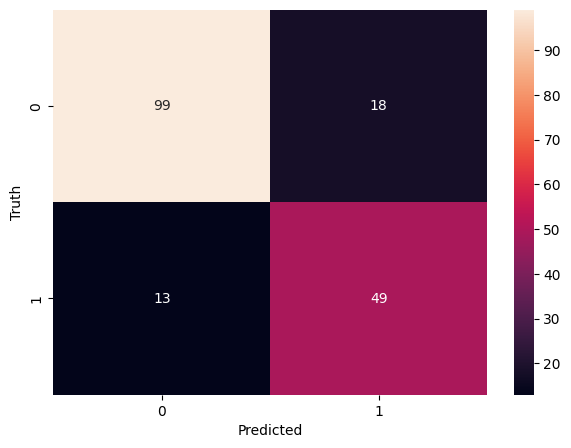

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')